In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("ACME-HappinessSurvey2020.csv")

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers

X1 = my order was delivered on time

X2 = contents of my order was as I expected

X3 = I ordered everything I wanted to order

X4 = I paid a good price for my order

X5 = I am satisfied with my courier

X6 = the app makes ordering easy for me


In [4]:
df

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
...,...,...,...,...,...,...,...
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5


Check if I need to do any data cleaning


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


Seems fine but dataset is small. Have to be careful with overfitting

Let's check the distribution/class balance


In [ ]:
df["Y"].value_counts(normalize=True)

Y
1    0.547619
0    0.452381
Name: proportion, dtype: float64

54% are happy and 45% are unhappy. Seems pretty well balanced so far. Let's check the distributions


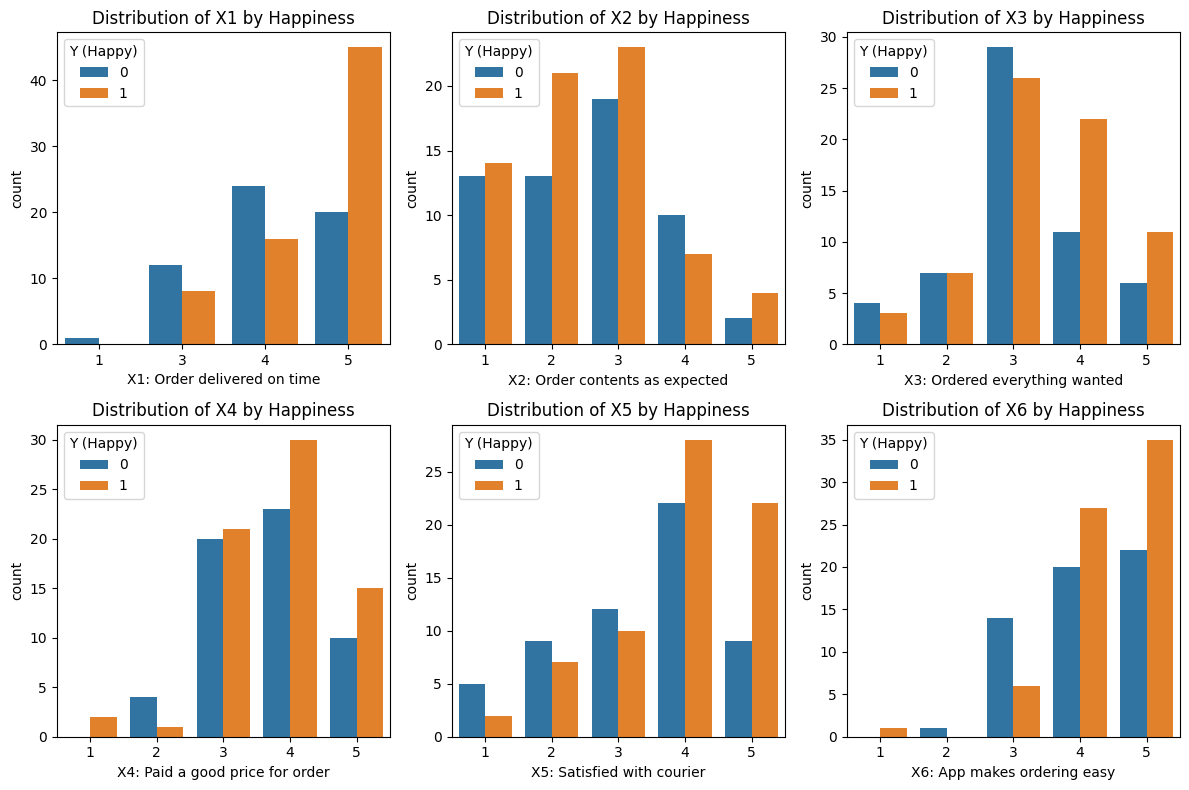

In [28]:
feature_explanations = {
    "X1": "X1: Order delivered on time",
    "X2": "X2: Order contents as expected",
    "X3": "X3: Ordered everything wanted",
    "X4": "X4: Paid a good price for order",
    "X5": "X5: Satisfied with courier",
    "X6": "X6: App makes ordering easy",
}

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(["X1", "X2", "X3", "X4", "X5", "X6"]):
    sns.countplot(data=df, x=col, hue="Y", ax=axes[i])
    axes[i].set_title(f"Distribution of {col} by Happiness")
    axes[i].set_xlabel(feature_explanations[col])
    axes[i].legend(title="Y (Happy)", loc="upper left")

plt.tight_layout()

From the plot, we see that

- Many people were happy about the app being easy to use, paying a good price for their orders and orders being delivered on time.
- Most people were unhappy because they their couldn't order everything they wanted (not enough of some item) and the order was not always delivered on time.
- For X1, the unhappy people clustered around scores of 4-5. This should also be our main predictor since the company focuses on on-demand and timely deliveries.
- X2 is a bit of a mixed bag. Most people fell in the scores of 2-3 so it could go either way.
- Unhappy people in X3 mostly gave a score of 3. If they could find the item they wanted, they are happy.
- X4 is also a bit of a mixed bag with most people giving a score of 4-5.

A correlation matrix may tell a better picture


In [10]:
corr = df.corr()

In [11]:
corr

,Y,X1,X2,X3,X4,X5,X6
Y,1.000000,0.280160,-0.024274,0.150838,0.064415,0.224522,0.167669
X1,0.280160,1.000000,0.059797,0.283358,0.087541,0.432772,0.411873
X2,-0.024274,0.059797,1.000000,0.184129,0.114838,0.039996,-0.062205
X3,0.150838,0.283358,0.184129,1.000000,0.302618,0.358397,0.203750
X4,0.064415,0.087541,0.114838,0.302618,1.000000,0.293115,0.215888
X5,0.224522,0.432772,0.039996,0.358397,0.293115,1.000000,0.320195
X6,0.167669,0.411873,-0.062205,0.203750,0.215888,0.320195,1.000000
